In [1]:
# importing tools required to solve the problem.

import numpy as np
import pandas as pd
import pandas_profiling 
import sklearn
import seaborn as sns
import tensorflow as tf
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
# read the excel file 

df = pd.read_excel("Train_dataset.xlsx",header = 0)
df.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [3]:
df.isnull().sum()    #    check for null values

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

<AxesSubplot:>

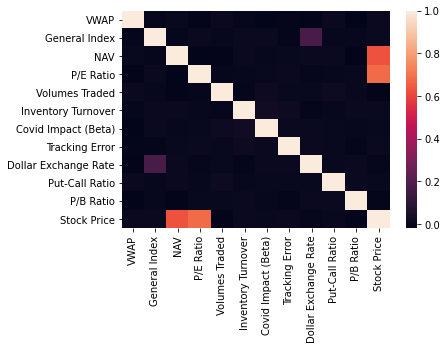

In [4]:
sns.heatmap(df.corr())     #   a heatmap representation of correlation amoung attributes in dataset

In [5]:
#     Data Preprocessing 
#     filling missing values for train_data

df["Inventory Turnover"].fillna(df["Inventory Turnover"].mean(), inplace=True)
df["Covid Impact (Beta)"].fillna(df["Covid Impact (Beta)"].mean(), inplace=True)
df["P/E Ratio"].fillna(df["P/E Ratio"].mean(), inplace=True)
df["NAV"].fillna(df["NAV"].mean(), inplace=True)


df= df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [6]:
df = df.drop(columns = ['Stock Index', 'Index'])   #   droping redunt

In [7]:
df['Industry'] = df['Industry'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)    #   categorizing Industry attribute.

In [8]:
# spliting into x and y

x = df[['Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
y = df['Stock Price']

print(x.shape, y.shape)

(6934, 12) (6934,)


In [9]:
# train test split with test size 0.3

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state= 1)

In [10]:
# trying XGBoost regressor

from sklearn.metrics import r2_score,mean_absolute_error

xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 

xgb_r.fit(train_x, train_y)

xg_preds = xgb_r.predict(test_x)
print("MSE : ",MSE(test_y, xg_preds), "\nR^2 : ",r2_score(test_y,xg_preds),"\nmae : ",mean_absolute_error(test_y, xg_preds))

[22:55:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  1368.800400020766 
R^2 :  0.9923296459363726 
mae :  21.858845672331128


In [52]:
# now working with test dataset

df_test = pd.read_excel("Test_dataset.xlsx")
df_test.columns

Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'],
      dtype='object')

In [53]:
stock_index = df_test['Stock Index']
stock_index

0       AC3235
1       AC3236
2       AC3237
3       AC3238
4       AC3239
         ...  
3326    AD2734
3327    AD2735
3328    AD2736
3329    AD2737
3330    AD2738
Name: Stock Index, Length: 3331, dtype: object

In [54]:
df_test.isnull().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     12
General Index           271
NAV                     275
P/E Ratio               292
Volumes Traded           48
Inventory Turnover       30
Covid Impact (Beta)      31
Tracking Error          126
Dollar Exchange Rate    143
Put-Call Ratio          429
P/B Ratio               138
dtype: int64

In [55]:
df_test["Inventory Turnover"].fillna(df_test["Inventory Turnover"].mean(), inplace=True)
df_test["Covid Impact (Beta)"].fillna(df_test["Covid Impact (Beta)"].mean(), inplace=True)
df_test["P/E Ratio"].fillna(df_test["P/E Ratio"].mean(), inplace=True)
df_test["NAV"].fillna(df_test["NAV"].mean(), inplace=True)


df_test.fillna(df_test.mean())

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.590000,185.090000,1.206786e+07,2.780000,0.03,0.0330,74.9,0.800000,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.200000,34.010000,6.172474e+06,6.780000,0.11,0.0464,17.7,0.860000,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.410000,177.400000,1.747249e+07,4.360000,0.23,0.0401,1.0,0.930000,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.360000,105.440000,1.555316e+07,2.770000,0.78,0.0187,74.9,1.090000,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.900000,139.400000,1.252578e+07,5.930000,0.03,0.0261,1.0,0.938828,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,AD2734,NSE,Energy,121.58,11270.15,11.930000,122.280000,1.403440e+07,2.870000,0.11,0.0602,74.9,0.860000,7.87
3327,AD2735,BSE,Energy,692.25,38182.08,54.257196,104.731629,1.018308e+07,5.422872,0.11,0.0388,74.9,0.640000,0.95
3328,AD2736,NSE,Energy,911.37,11270.15,54.257196,104.731629,1.018308e+07,5.422872,0.11,0.0166,74.9,0.670000,7.54
3329,AD2737,BSE,Healthcare,479.38,38182.08,20.520000,176.890000,3.069831e+06,3.600000,0.78,0.0495,74.9,0.790000,4.01


In [56]:
df_test

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.590000,185.090000,12067855.0,2.780000,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.200000,34.010000,6172474.0,6.780000,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.410000,177.400000,17472488.0,4.360000,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.360000,105.440000,15553159.0,2.770000,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.900000,139.400000,12525784.0,5.930000,0.03,0.0261,1.0,NaN,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,AD2734,NSE,Energy,121.58,11270.15,11.930000,122.280000,14034395.0,2.870000,0.11,0.0602,74.9,0.86,7.87
3327,AD2735,BSE,Energy,692.25,38182.08,54.257196,104.731629,NaN,5.422872,0.11,0.0388,74.9,0.64,0.95
3328,AD2736,NSE,Energy,911.37,11270.15,54.257196,104.731629,NaN,5.422872,0.11,0.0166,74.9,0.67,7.54
3329,AD2737,BSE,Healthcare,479.38,38182.08,20.520000,176.890000,3069831.0,3.600000,0.78,0.0495,74.9,0.79,4.01


In [57]:
df_test = df_test.drop(columns = ['Stock Index', 'Index'])

df_test['Industry'] = df_test['Industry'].astype('category')
cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

x_test = df_test[['Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']]
#    predicting on test dataset
test_preds = xgb_r.predict(x_test)

In [58]:
test_preds

array([ 796.792  ,  240.65378, 1538.1703 , ...,  540.8863 ,  334.513  ,
       1231.4094 ], dtype=float32)

In [61]:
pred_df = stock_index.to_frame(name = 'Stock Index')
pred_df['Stock Price']=test_preds
pred_df

,Stock Index,Stock Price
0,AC3235,796.791992
1,AC3236,240.653778
2,AC3237,1538.170288
3,AC3238,819.642273
4,AC3239,275.657074
...,...,...
3326,AD2734,137.663681
3327,AD2735,540.886292
3328,AD2736,540.886292
3329,AD2737,334.513000


In [62]:
pred_df.to_csv('test_prediction.csv',index = False)   # saving the file

In [66]:
xgb_r.save_model('0001.model')    #.   saving the model